In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(city_df, ride_df, on = 'city')

## Bubble Plot of Ride Sharing Data

In [2]:
list(ride_df)

['city', 'date', 'fare', 'ride_id']

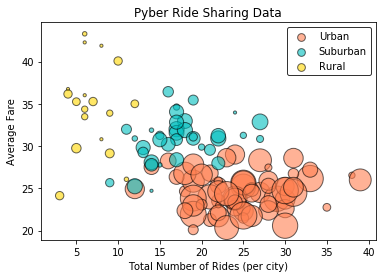

<Figure size 432x288 with 0 Axes>

In [3]:
# Group the pyber_df dataframe by city
pyber_group = pyber_df.groupby('city')

# calculate rides, average fare, and driver counts. Create a variable for the type of city
rides = pyber_group['ride_id'].count()
average_fare = pyber_group['fare'].mean()
driver = city_df.groupby(['city'])['driver_count'].sum()
city_type = city_df.set_index('city')['type']

# create a dataframe for the information of the grouped cities
city_data = pd.DataFrame({
    "Number of Rides": rides,
    "Average Fare": average_fare,
    "Number of Drivers": driver,
    "Type of City": city_type
})

# use loc to separate dataframe into city type
urban_city = city_data.loc[(city_data["Type of City"] == "Urban")]
suburban_city = city_data.loc[(city_data["Type of City"] == "Suburban")]
rural_city = city_data.loc[(city_data["Type of City"] == "Rural")]

# create scatter plot
plt.scatter(urban_city['Number of Rides'], urban_city['Average Fare'], s = urban_city['Number of Drivers']*10, 
            color = 'coral', edgecolor = 'black', label = 'Urban', alpha = .60, linewidth=1)
plt.scatter(suburban_city['Number of Rides'], suburban_city['Average Fare'], s = suburban_city['Number of Drivers']*10, 
            color = 'c', edgecolor = 'black', label = 'Suburban', alpha = .60, linewidth=1)
plt.scatter(rural_city['Number of Rides'], rural_city['Average Fare'], s = rural_city['Number of Drivers']*10, 
            color = 'gold', edgecolor = 'black', label = 'Rural', alpha = .60, linewidth=1)

# add a legend
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]
lgnd.legendHandles[2]._sizes = [60]

# add labels and show plot
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare')
plt.show()

# save figure
plt.savefig('Pyber_ride.png')

## Total Fares by City Type

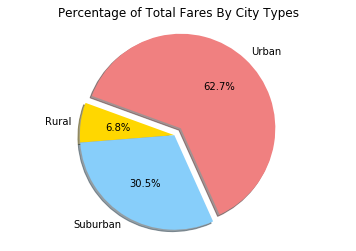

<Figure size 432x288 with 0 Axes>

In [4]:
# calculate Type Percents
total_fare = pyber_df.groupby(['type'])['fare'].sum()

# labels for the pie chart
labels = ["Rural","Suburban","Urban" ]

# colors for the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("Percentage of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.show()

# Save Figure
plt.savefig('total_fares.png')

## Total Rides by City Type

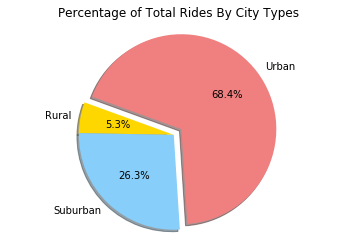

<Figure size 432x288 with 0 Axes>

In [5]:
# calculate Type Percents
total_rides = pyber_df.groupby(['type'])['ride_id'].count()

# labels for the pie chart
labels = ["Rural","Suburban","Urban" ]

# colors for the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("Percentage of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.show()

# Save Figure
plt.savefig('total_rides.png')

## Total Drivers by City Type

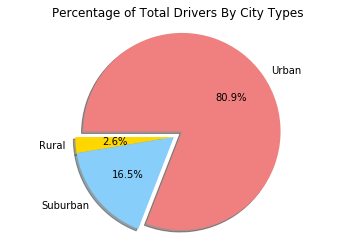

<Figure size 432x288 with 0 Axes>

In [6]:
# calculate Type Percents for drivers
total_drivers = city_data.groupby(['Type of City'])['Number of Drivers'].sum()

# labels for the pie chart
labels = ["Rural","Suburban","Urban" ]

# colors for the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("Percentage of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=180)
plt.axis("equal")
plt.show()

# Save Figure
plt.savefig('total_drivers.png')